In [1]:
import pandas as pd  # data manupulation
import numpy as np #
import matplotlib.pyplot as plt #data plotting
import seaborn #for data visulization
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


[0]


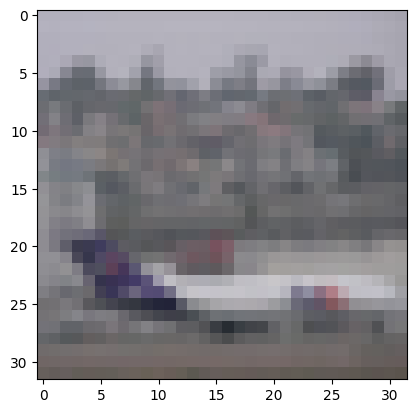

In [3]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])

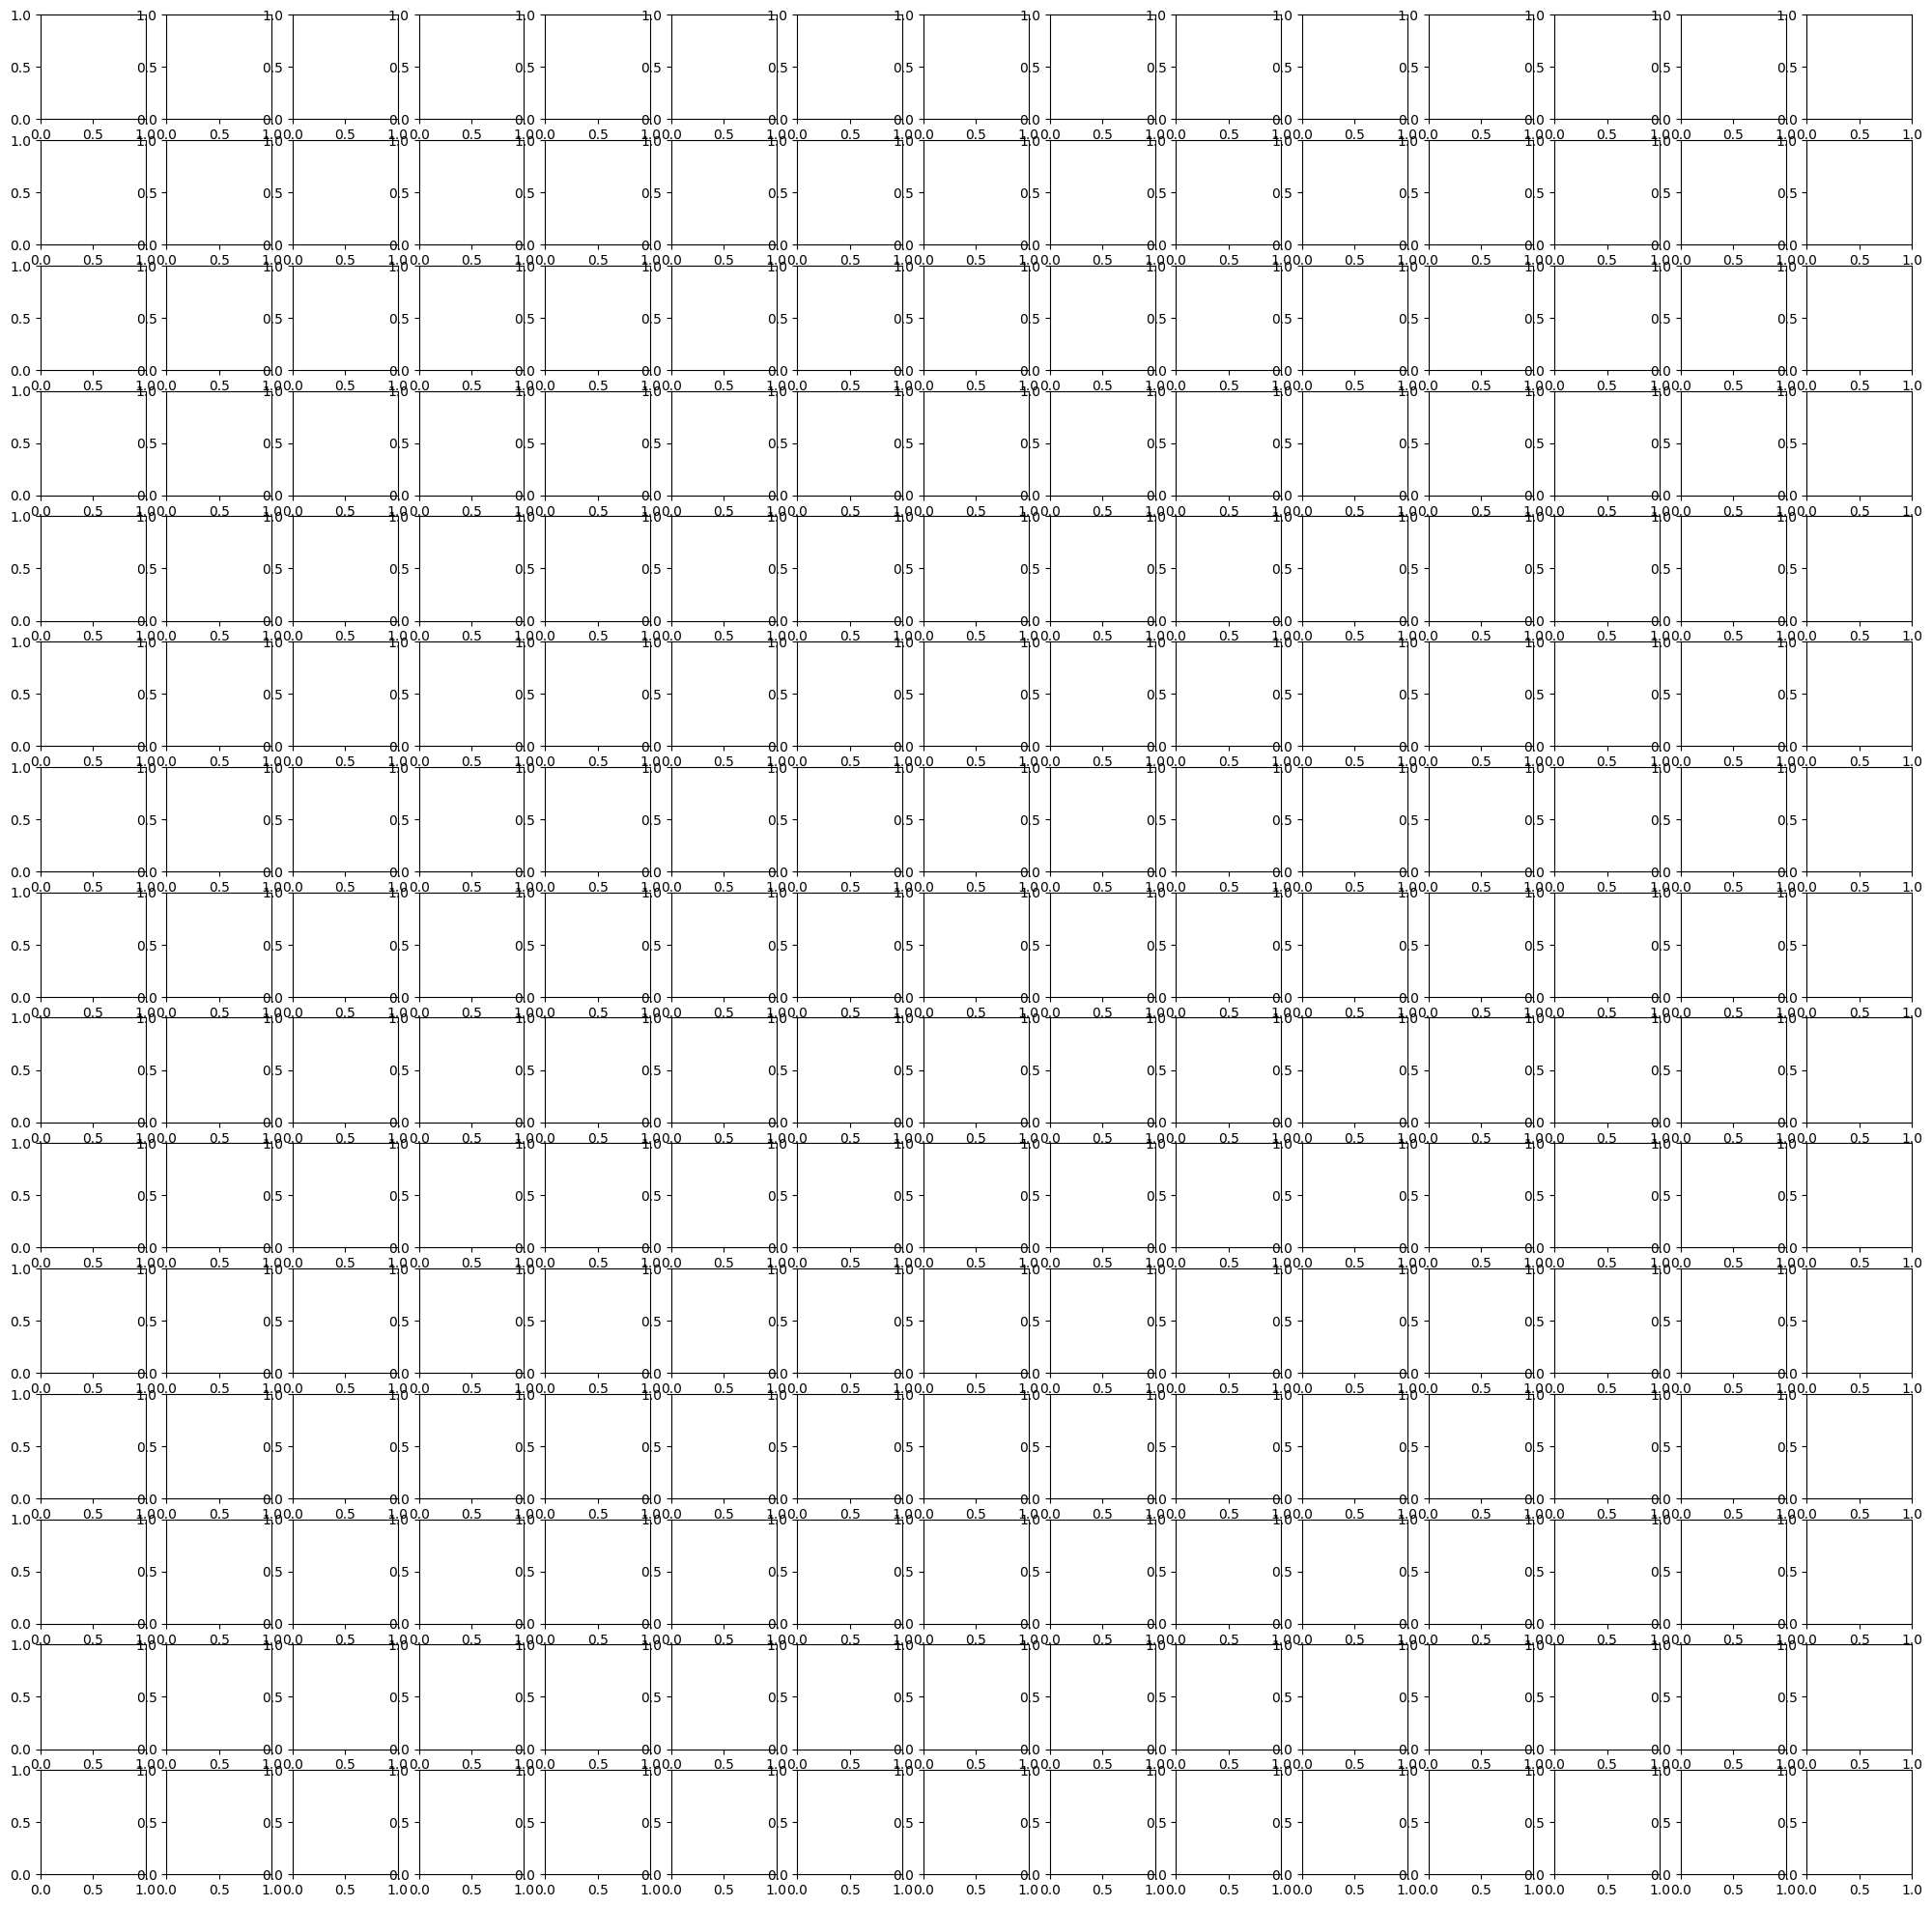

In [4]:
W_grid = 15 #width of grid
L_grid = 15  # length of grid

fig, axes = plt.subplots(L_grid,W_grid, figsize = (25,25))
#fig - It is the enitre figure
#axes - its the each subplot in the figure

axes = axes.ravel()
#ravel - To flatten each subplot

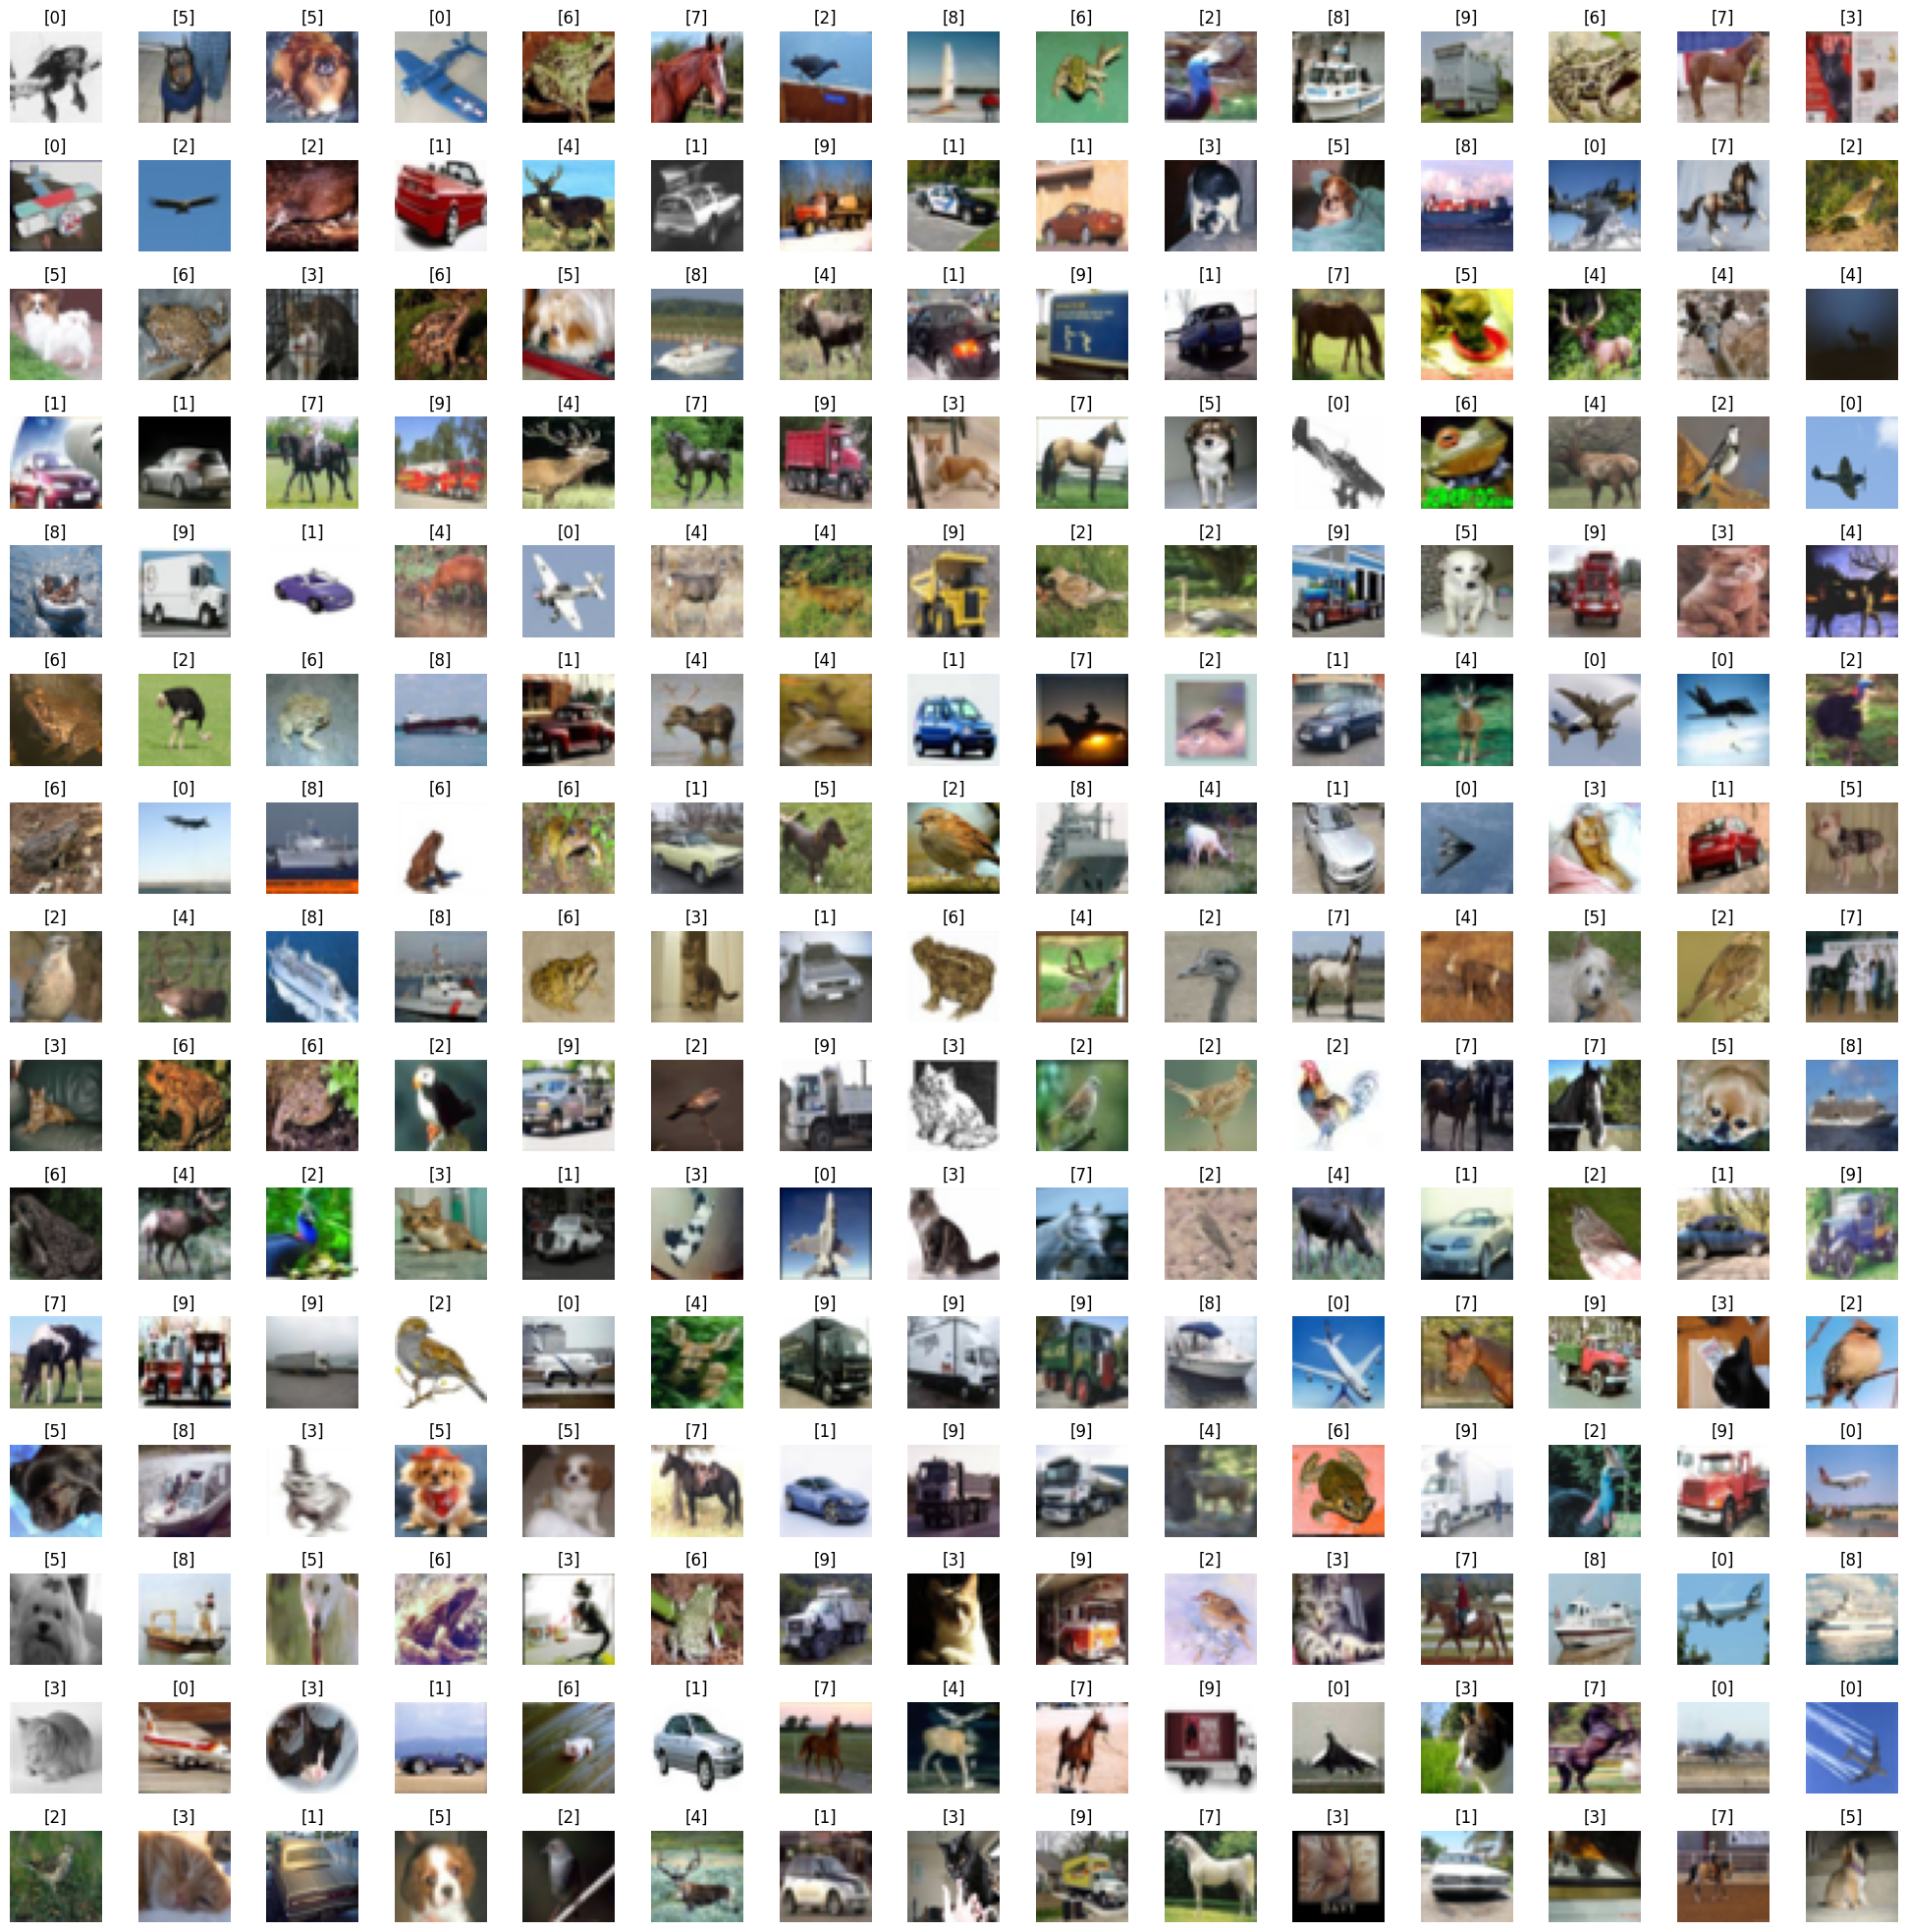

In [5]:
W_grid = 15 #width of grid
L_grid = 15  # length of grid

fig, axes = plt.subplots(L_grid,W_grid, figsize = (25,25))
#fig - It is the enitre figure
#axes - its the each subplot in the figure

axes = axes.ravel()
#ravel - To flatten each subplot

#np.arange is used to create an array with index 0 to 255
n_training = len(X_train)

#np.random.randint is used to randomly slect an integer value from 0 to 50000
for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index]) #Creating label for each image
  axes[i].axis('Off') #Removing the axis dimensions

plt.subplots_adjust(hspace = 0.4) #hspace is adjusting the space between two images



In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(len(X_train))

50000


In [7]:
number_categories = 10

In [8]:
import keras
y_train = keras.utils.to_categorical(y_train, number_categories)

In [9]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [10]:
y_test = keras.utils.to_categorical(y_test, number_categories)

In [11]:
#Data Normalization which ranges from 0 to 1

X_train = X_train/255
X_test = X_test/255

In [12]:
#Extracting only the dimensions to provide the imput

Input_shape = X_train.shape[1:]
print(Input_shape)

(32, 32, 3)


In [13]:
#To build the model in sequential manner -left to right

from keras.models import Sequential

#Conv2D- for convolution
#MaxPooling2D - for subsampling (To get the maximun value of the pixels)
#AveragePooling2D - (To get the average vales of the pixels)
#Dense - To connent the neural network
#Flatten - To flatten all the feature maps to one simple array of neurons
#Dropout - To perform some regularization (Which is droping some neurons along with their weights to improve the generalization capability of network)
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

#Adam - To perform optimization (To obtain the weights of the network)
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [14]:
'''The provided code snippet appears to be part of a Convolutional Neural Network (CNN) model architecture definition in a deep learning framework such as Keras or TensorFlow. Let's break down the code:

```python
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
```

Explanation:
- `cnn_model`: This is a variable representing a sequential model in Keras or TensorFlow, to which layers are being added sequentially.
- `.add()`: This method is used to add layers to the model.
- `Conv2D`: This represents a 2-dimensional convolutional layer, commonly used in CNNs for extracting features from input images.
- `filters=32`: This parameter specifies the number of filters (or kernels) that the convolutional layer will learn. Each filter extracts different features from the input.
- `kernel_size=(3,3)`: This parameter specifies the size of the convolutional kernel or filter. In this case, it's a 3x3 kernel, meaning each filter will slide over the input image in a 3x3 window.
- `activation='relu'`: This parameter specifies the activation function applied element-wise to the output of the convolutional layer. `'relu'` stands for Rectified Linear Unit, a commonly used activation function in deep learning due to its ability to introduce non-linearity to the model.
- `input_shape=input_shape`: This parameter specifies the shape of the input data expected by the convolutional layer. `input_shape` is a tuple representing the shape of the input data, typically in the format `(height, width, channels)` for image data.

Overall, this line of code adds a 2D convolutional layer to the CNN model with 32 filters, each with a 3x3 kernel size, using the ReLU activation function, and expects input data with the shape specified by `input_shape`.'''

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 96, kernel_size =(3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 96, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


In [15]:
# Adding more layers to increase the depth of the neural network
cnn_model.add(Conv2D(filters = 192, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 192, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))

In [16]:
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

In [17]:
#Output Layer
#Softmax function is used since the output will be 0 or 1
#Units = 10 signify the 10 classes
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [18]:
cnn_model.compile(loss= 'categorical_crossentropy', optimizer=Adam(learning_rate=1.0e-4), metrics = ['accuracy'])

In [20]:
history = cnn_model.fit( X_train, y_train, batch_size = 32, epochs = 20, validation_data=(X_test, y_test), shuffle = True)

Epoch 1/20
1563/1563 [==============================] - 1008s 645ms/step - loss: 1.0667 - accuracy: 0.6217 - val_loss: 0.9353 - val_accuracy: 0.6738
Epoch 2/20
1563/1563 [==============================] - 1001s 641ms/step - loss: 0.9392 - accuracy: 0.6698 - val_loss: 0.8574 - val_accuracy: 0.6980
Epoch 3/20
1563/1563 [==============================] - 1001s 641ms/step - loss: 0.8345 - accuracy: 0.7070 - val_loss: 0.7826 - val_accuracy: 0.7308
Epoch 4/20
1563/1563 [==============================] - 1003s 641ms/step - loss: 0.7536 - accuracy: 0.7371 - val_loss: 0.7479 - val_accuracy: 0.7428
Epoch 5/20
1563/1563 [==============================] - 977s 625ms/step - loss: 0.6939 - accuracy: 0.7598 - val_loss: 0.7238 - val_accuracy: 0.7482
Epoch 6/20
1563/1563 [==============================] - 1006s 644ms/step - loss: 0.6340 - accuracy: 0.7770 - val_loss: 0.7088 - val_accuracy: 0.7537
Epoch 7/20
1563/1563 [==============================] - 1005s 643ms/step - loss: 0.5829 - accuracy: 0.7960 

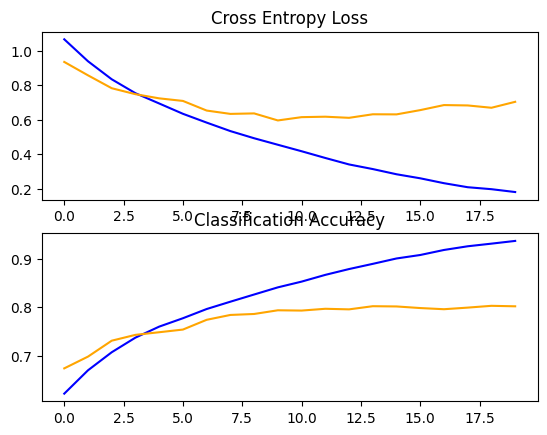

In [21]:
# plot loss
from matplotlib import pyplot

def summarize_diagnostics(history):
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue',label='train')
  pyplot.plot(history.history['val_loss'], color='orange',label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue',label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange',label='test')

summarize_diagnostics(history)

In [22]:
evaluation = cnn_model.evaluate( X_test, y_test, batch_size = 1)
#evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 101s 10ms/step - loss: 0.7036 - accuracy: 0.8016
Test accuracy: 0.8015999794006348


In [23]:
predicted_probabilities = cnn_model.predict(X_test,batch_size = 1)
predicted_classes = np.argmax(predicted_probabilities , axis=1)
print(predicted_classes)

10000/10000 [==============================] - 109s 11ms/step
[5 8 1 ... 5 1 7]


In [24]:
y_test = y_test.argmax(1)

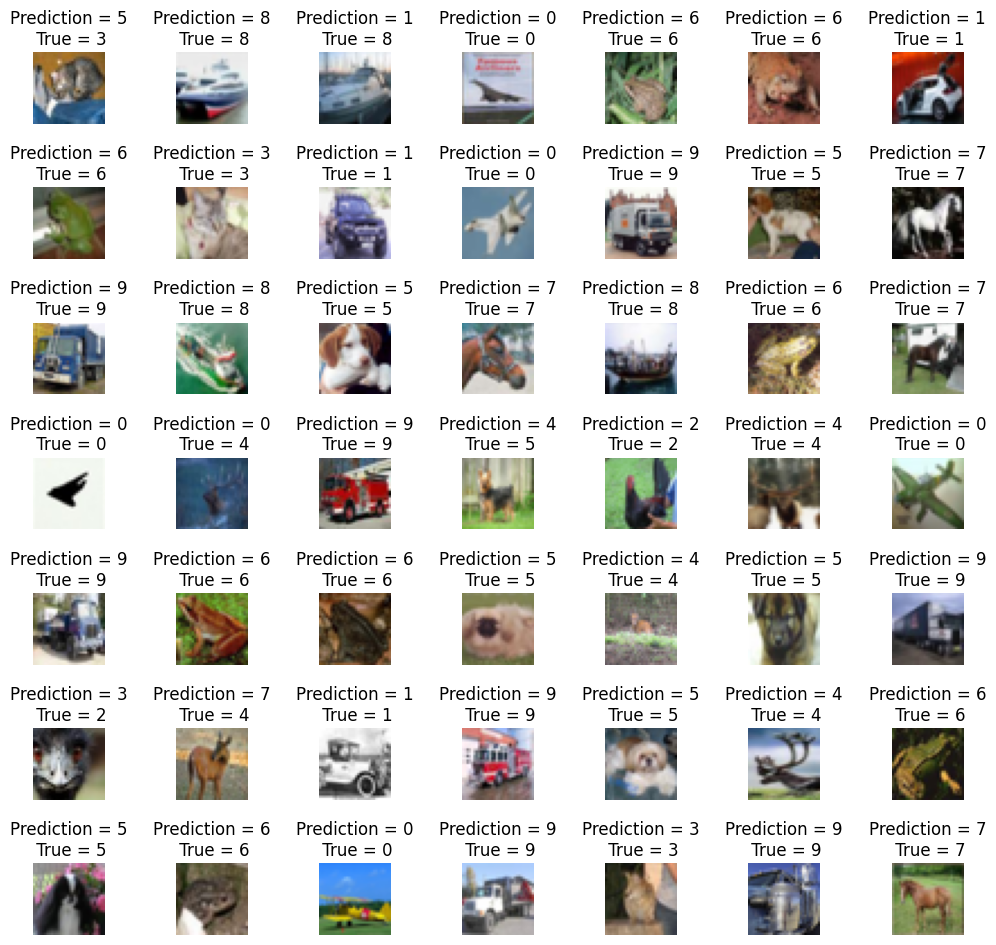

In [25]:
L = 7
W = 7
fig, axes = plt.subplots(L,W, figsize = (12,12))
#fig - It is the enitre figure
#axes - its the each subplot in the figure

axes = axes.ravel()
#ravel - To flatten each subplot


#np.random.randint is used to randomly slect an integer value from 0 to 50000
for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_test[i])) #Creating label for each image
  axes[i].axis('Off') #Removing the axis dimensions

plt.subplots_adjust(wspace = 1) #hspace is adjusting the space between two images

[[842  17  33  16  18   3   4   6  28  33]
 [  6 916   3   4   2   1   4   0   8  56]
 [ 51   3 720  44  63  43  38  19  10   9]
 [ 23   9  77 625  45 133  35  31   5  17]
 [  7   1  59  53 765  26  28  57   2   2]
 [ 10   2  36 145  42 699  14  48   0   4]
 [  8   3  34  62  21  14 850   3   3   2]
 [ 10   1  20  28  32  32   0 871   0   6]
 [ 63  37  12  12   3   8   4   2 833  26]
 [ 16  47   5  12   3   2   4   8   8 895]]


<Axes: >

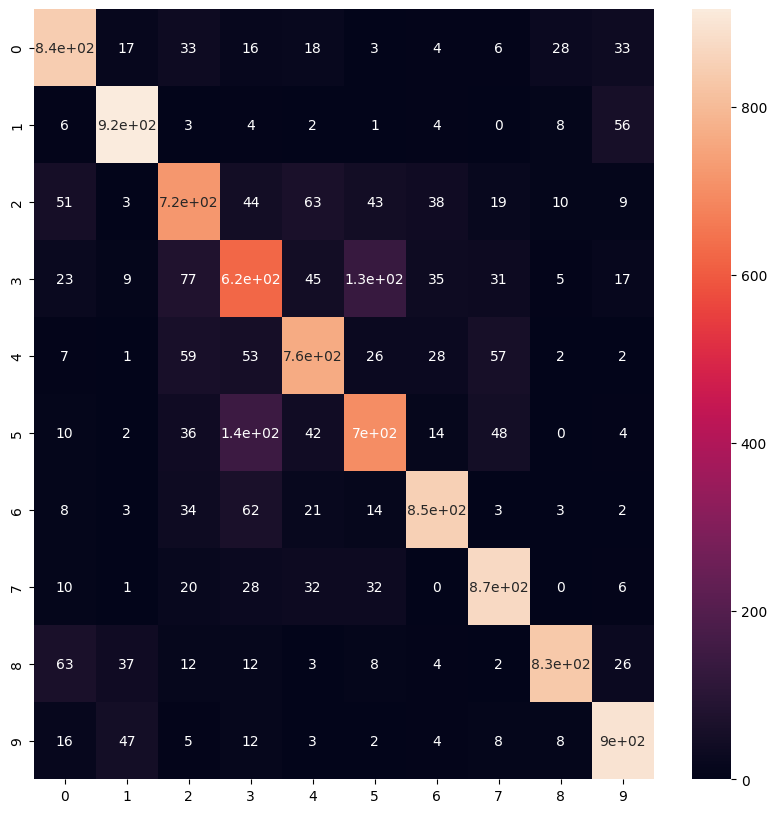

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
print(cm)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)